# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.659628e+01     1.234771e+01
 * time: 0.0017800331115722656
     1     3.598625e+01     7.527765e+00
 * time: 0.004739999771118164
     2     2.500338e+01     2.093540e+00
 * time: 0.011503934860229492
     3     2.277811e+01     3.940395e+00
 * time: 0.01685500144958496
     4     2.095399e+01     1.983166e+00
 * time: 0.02186298370361328
     5     2.029466e+01     1.443607e+00
 * time: 0.027060985565185547
     6     1.997118e+01     2.067399e+00
 * time: 0.03149890899658203
     7     1.962813e+01     1.444553e+00
 * time: 0.036859989166259766
     8     1.920915e+01     1.530412e+00
 * time: 0.04149794578552246
     9     1.867408e+01     1.155692e+00
 * time: 0.04614710807800293
    10     1.825931e+01     1.016527e+00
 * time: 0.05059409141540527
    11     1.796194e+01     9.204052e-01
 * time: 0.05513906478881836
    12     1.779674e+01     8.589985e-01
 * time: 0.05954408645629883
    13     1.765423e+01     5.799212e-01
 *

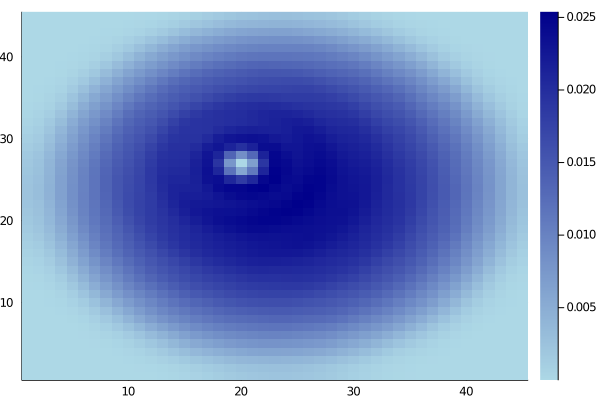

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)